# Использование NumPy

## Описание работы
Данная работа представлена набором заданий, которые позволят на практике узнать о 
возможностях библиотеки Numerical Python.

## Задачи
    1. Выполнить установку и подключение библиотеки в программе на языке Python. Для этого 
    рекомендуется использовать менеджер пакетов pip.
    2. Выполнить генерацию:
        a. линейного массива (вектора) чисел с плавающей точкой произвольного размера;
        b. выполнить генерацию двумерного массива (матрицы) чисел с плавающей точкой
        произвольного размера;
        c. генерацию массивов выполнять с размерностью в сотни, тысячи, сотни тысяч 
        элементов.
        d. для каждого массива выполнить оценку времени, затраченного на генерацию.
        e. сравнить показатели с массивами, генерируемыми средствами стандартной 
        библиотеки языка Python аналогичной размерности.
    3. Выполнить все арифметические операции над элементами двумерного массива.
    4. В качестве полноценного упражнения реализовать игру «Жизнь» использованием NumPy.

## Отчет
Отчет должен включать примеры выражений на языке Python по каждому пункту, а также 
примеры с частями выходных данных. Для пункта №4 необходимо привести полный листинг 
программы.

Для защиты отчета необходимо выполнить пояснение представленного кода, а также доработку 
согласно требованиям (замечаниям) преподавателя (при наличии таковых).

In [1]:
import numpy as np

array1d = np.random.rand(1, 5)
array2d = np.random.rand(5, 5)
array1d, array2d


(array([[0.11061325, 0.1882128 , 0.63839144, 0.2710373 , 0.22268373]]),
 array([[0.83804779, 0.98762115, 0.593983  , 0.33994261, 0.52078812],
        [0.93147472, 0.0579752 , 0.12567403, 0.11424053, 0.80955257],
        [0.7085427 , 0.49962879, 0.24752474, 0.47590494, 0.51057682],
        [0.40246419, 0.24737967, 0.88397646, 0.53469982, 0.87526032],
        [0.00565942, 0.08510835, 0.84733746, 0.86010015, 0.59104283]]))

In [2]:
import numpy as np
import random
import time

for k in [10**2, 10**3, 10**4]:
    """
    if i choose 10**5 x 10**5 array size i will get Memory Error
    """
    # array generation from numpy methods:
    start = time.time()
    np_array = np.random.rand(k, k) # two dimension np array
    duration = time.time() - start
    print(f"numpy generator time {k}x{k}", duration)
    
    # array generation from py methods
    start = time.time()
    py_array = [[random.random() for i in range(k)] for j in range(k)]
    duration = time.time() - start
    print(f"py generator time {k}x{k}", duration)

numpy generator time 100x100 0.0
py generator time 100x100 0.0009996891021728516
numpy generator time 1000x1000 0.0070037841796875
py generator time 1000x1000 0.07862401008605957
numpy generator time 10000x10000 0.623837947845459
py generator time 10000x10000 7.801115274429321


In [3]:
import numpy as np

array1 = np.random.rand(5, 5)
array2 = np.random.rand(5, 5)

# sum
array1 + array2 
# sub
array1 - array2
# mul
array1 * array2
# div
array1/array2
# exp
array1**np.e
# transponse
array1.T
# matrix multiplication
array1@array2

array([[1.19923777, 1.69018878, 1.15560555, 1.94807708, 1.44141678],
       [0.80521832, 1.87153979, 1.06620774, 1.96674698, 1.53148317],
       [0.49987688, 1.45438014, 0.57310971, 0.91530346, 0.61695652],
       [0.41772075, 1.11639982, 0.53046422, 0.87368873, 0.92311326],
       [0.55625323, 0.81226456, 0.75284379, 1.29812285, 1.16106879]])

## Conway's Game of Life

MovieWriter ffmpeg unavailable; using Pillow instead.


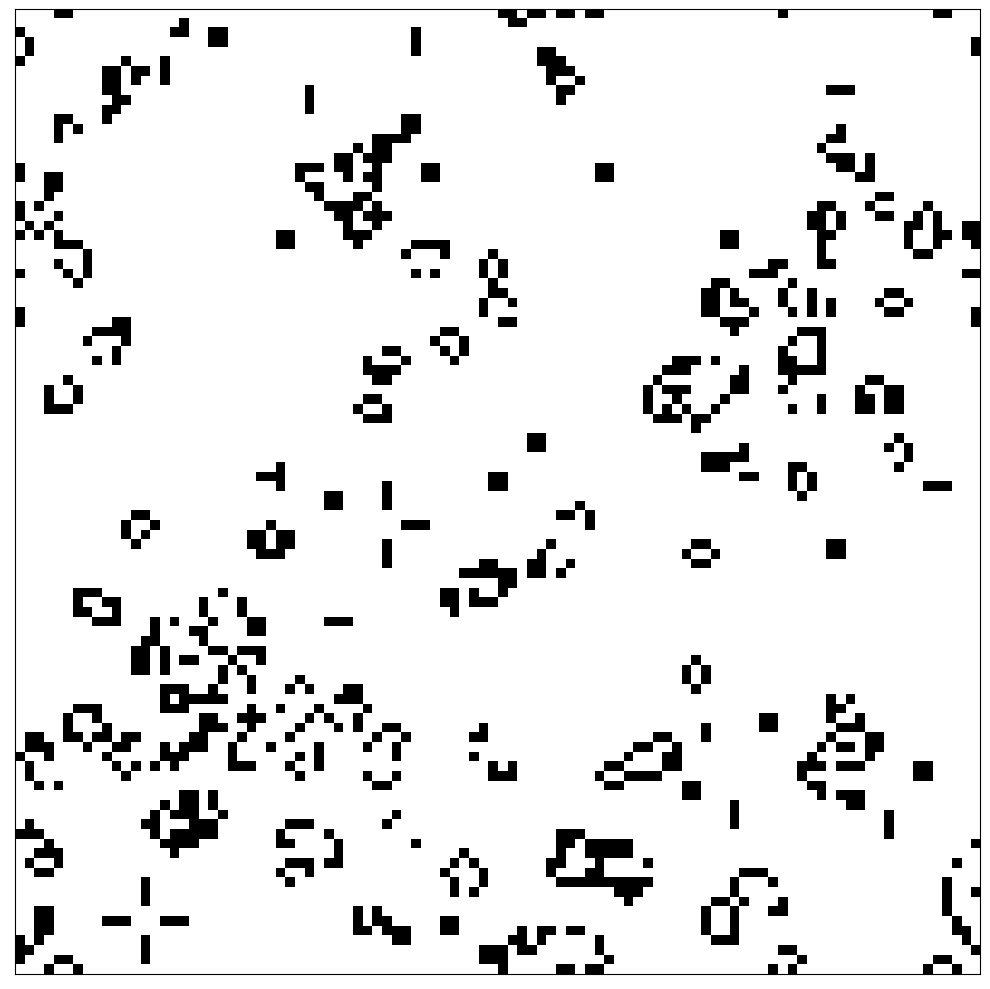

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.colors import ListedColormap


grid, grid_size, img_plot = 0, 0, 0

def initialize_life(size):
    field = np.random.choice([0, 1], size * size, p=[0.8, 0.2]).reshape(size, size)
    return field

def step(frame):
    global grid, grid_size, img_plot
    if frame < 3:   # no movement for the first few steps
        new_grid = grid
    else:
        new_grid = np.zeros_like(grid)
        for x in range(grid_size):
            for y in range(grid_size):
                total = sum(
                    [grid[(x + i) % grid_size, (y + j) % grid_size] for i in range(-1, 2) for j in range(-1, 2)])
                if grid[x, y] == 1 and total - 1 in (2, 3):
                    new_grid[x, y] = 1
                elif grid[x, y] == 0 and total == 3:
                    new_grid[x, y] = 1
                else:
                    new_grid[x, y] = 0
        grid = new_grid
    img_plot.set_data(new_grid)
    return img_plot,

def conway(random=True, size=100):
    global grid, grid_size, img_plot
    grid_size = size
    grid = initialize_life(size)
    fig, ax = plt.subplots(figsize=(10, 10))
    img_plot = ax.imshow(grid, interpolation='nearest', cmap=ListedColormap(['white', 'gray']))
    ax.set_xticks([])
    ax.set_yticks([])
    ani = animation.FuncAnimation(fig, frames=100, func=step, interval=100)
    plt.tight_layout()
    ani.save('conway_game_life.gif')
    plt.show()
    return ani

conway(size=100)